In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Приоритет блюд

In [2]:
plt.rcParams["figure.figsize"] = (20,5)
data = pd.read_csv('C:/Users/kiril/Desktop/td/train_with_menu.csv')
df1 = pd.read_csv('C:/Users/kiril/Desktop/td/menu_train.csv')
data = data[data['person_id']==0]
#max=566 len=480
def listfromstr1(stroka):
    return np.fromstring(stroka[1:len(stroka)-1:1], dtype=int, sep=' ')

def listfromstr(stroka):
    return np.fromstring(stroka[1:len(stroka)-1:1], dtype=int, sep=',')

def good_0(good_id,number):
    return listfromstr(good_id).tolist().count(number)

def good_1(good_id,number):
    return listfromstr1(good_id).tolist().count(number)


rows = []
columns = ['good_id', 'count_buy', 'in_menu', 'priority']
#69576
for i in range(0,567):
    in_menu = df1['good_id'].apply(good_1,number=i).sum()
    if (in_menu != 0):
        count_buy = data['good_id'].apply(good_0,number=i).sum()
        row = [i, count_buy, in_menu, count_buy/in_menu]
        rows.append(row)
    
data_need = pd.DataFrame(rows, columns=columns)

In [3]:
def good_2(good_id,number):
    if (listfromstr(good_id).tolist().count(number) != 0):
        return 1
    return 0

rows = []
columns = ['count_buy_days', 'no_buy']
#69576
for i in range(0,567):
    in_menu = df1['good_id'].apply(good_1,number=i).sum()
    if (in_menu != 0):
        count_buy_days = data['good_id'].apply(good_2,number=i).sum()
        row = [count_buy_days, in_menu - count_buy_days]
        rows.append(row)
    
data_need['count_buy_days'] = pd.DataFrame(rows, columns=columns)['count_buy_days']
data_need['no_buy'] = pd.DataFrame(rows, columns=columns)['no_buy']

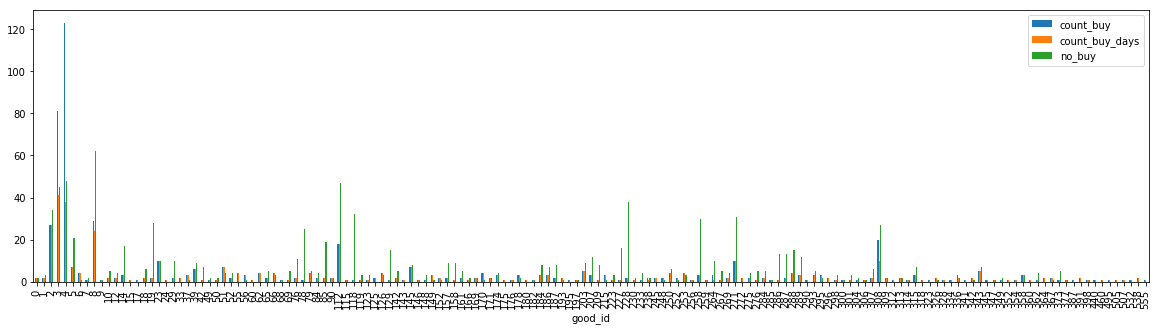

In [4]:
data_need[data_need['count_buy']!=0].groupby(['good_id'])['count_buy','count_buy_days','no_buy'].mean().plot(kind='bar')

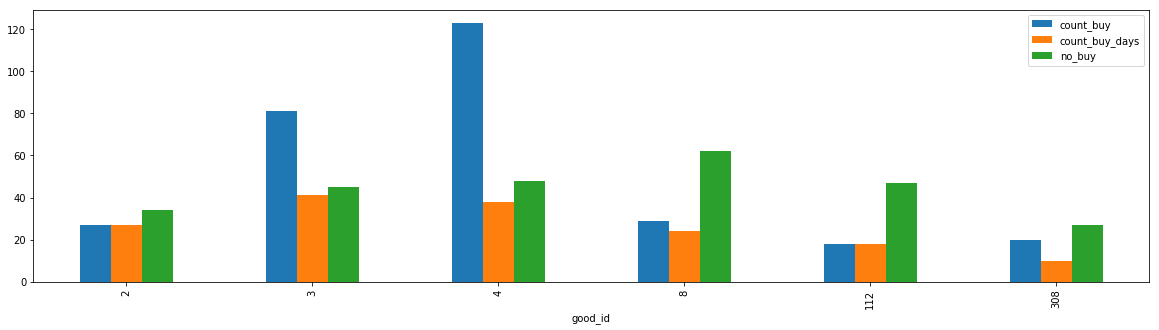

In [5]:
data_need[data_need['count_buy'] > 10].groupby(['good_id'])['count_buy','count_buy_days','no_buy'].mean().plot(kind='bar')

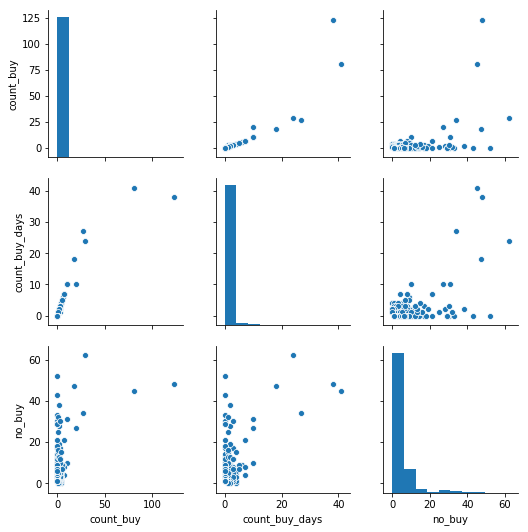

In [6]:
sns.pairplot(data_need[['count_buy','count_buy_days','no_buy']])

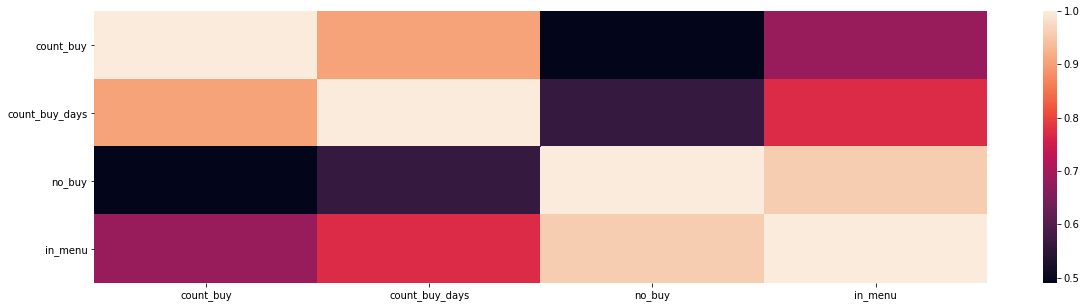

In [7]:
sns.heatmap(data_need[['count_buy','count_buy_days','no_buy','in_menu']].corr());

Text(0, 0.5, 'Количество дней без покупок')

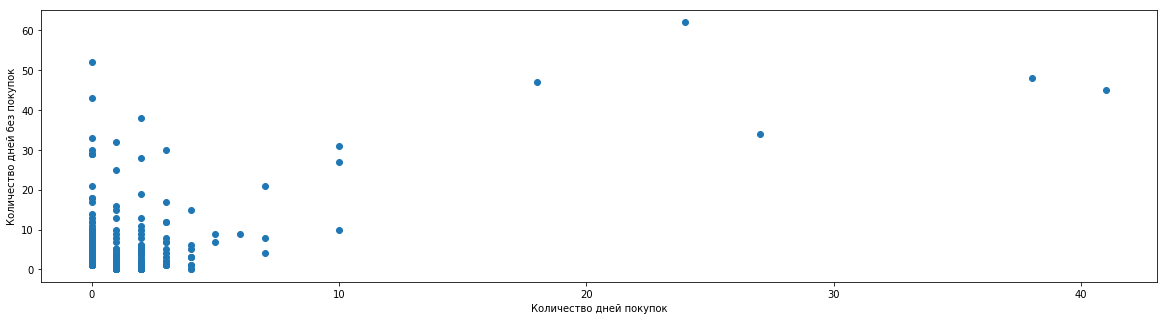

In [8]:
plt.scatter(data_need['count_buy_days'],data_need['no_buy'])
plt.xlabel('Количество дней покупок')
plt.ylabel('Количество дней без покупок')

In [9]:
len(data_need[data_need['count_buy']!=0]['good_id'].unique())

155

In [10]:
2**155

45671926166590716193865151022383844364247891968

In [15]:
data_need.drop('priority',axis=1,inplace=True)

In [17]:
data_need.head()

,good_id,count_buy,in_menu,count_buy_days,no_buy
0,0,2,4,2,2
1,1,2,5,2,3
2,2,27,61,27,34
3,3,81,86,41,45
4,4,123,86,38,48


In [18]:
data_need.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
good_id           480 non-null int64
count_buy         480 non-null int64
in_menu           480 non-null int64
count_buy_days    480 non-null int64
no_buy            480 non-null int64
dtypes: int64(5)
memory usage: 18.8 KB


In [13]:
data = pd.read_csv('C:/Users/kiril/Desktop/td/train_with_menu.csv')

In [14]:
data['person_id'].unique()

array([   1,  626, 1819, ..., 2326, 2361, 1697], dtype=int64)